In [1]:
%matplotlib inline
import pandas as pd

In [19]:
from matplotlib import pyplot as plt

In [2]:
import glob

In [3]:
dfs = {}
for fpath in glob.glob('dr202a2/*.sas7bdat'):
    dfname = fpath.replace('dr202a2/dr202a2_', '').replace('.sas7bdat', '')
    dfs[dfname] = pd.read_sas(fpath, format = 'sas7bdat', encoding='ISO-8859-1')

In [4]:
df_pat_cipher = dfs['pat_cipher']
df_vis_cipher = dfs['vis_cipher']
df_patient = dfs['patient']
df_visit = dfs['visit']
df_diagnosis = dfs['diagnosis']
df_procedure = dfs['procedure']
df_vital = dfs['vital']
df_heights = dfs['heights']
df_weights = dfs['weights']
df_bmi = dfs['bmi']

In [87]:
for k, df in dfs.items():
    if 'cipher' not in k:
        df.to_csv('dr202a2/dr202a2_%s.csv'%k, index=False)

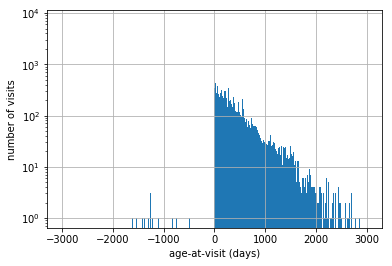

In [95]:
df_visit.VISIT_AGE_DAYS.hist(bins=pd.np.arange(-3000.5, 3000.5))
plt.yscale('log')
plt.xlabel('age-at-visit (days)')
plt.ylabel('number of visits')
plt.savefig('vis_age_log.png', bbox_inches='tight')

In [22]:
df_visit.AGE_AT_VISIT.value_counts()

 0.0    70589
 1.0    69530
 2.0    26553
 3.0    10754
 4.0     5734
 5.0     2014
 6.0      958
 7.0      432
-3.0       90
-2.0       58
 8.0       48
-4.0       43
-1.0       29
-5.0       11
-6.0        5
-7.0        1
Name: AGE_AT_VISIT, dtype: int64

In [32]:
df_weights.head()

STUDY_ID  VISIT_ID  VITAL_VALUE_NUM VITAL_VALUE_UNIT COLLECTION_DATE  \
0       1.0  144781.0            3.572               kg      2017-06-15   
1       1.0  144782.0            3.578               kg      2017-06-26   
2       1.0  144783.0            6.084               kg      2017-08-28   
3       1.0  144784.0            8.122               kg      2017-12-14   
4       1.0  144786.0            9.384               kg      2018-08-18   

  OBSERVATION_TYPE  
0           WEIGHT  
1           WEIGHT  
2           WEIGHT  
3           WEIGHT  
4           WEIGHT

In [51]:
age_pos_visit_ids = df_visit[df_visit.VISIT_AGE_DAYS>=0].VISIT_ID
age_pos_hts = df_heights.VISIT_ID.isin(age_pos_visit_ids.values)
X, Y = zip(
    *(df_heights[age_pos_hts].merge(
        df_weights,
        how='inner',
        on='VISIT_ID',
        suffixes=('_h', '_w')
    )[['VITAL_VALUE_NUM_h', 'VITAL_VALUE_NUM_w']].values)
)

In [35]:
from matplotlib.colors import LogNorm

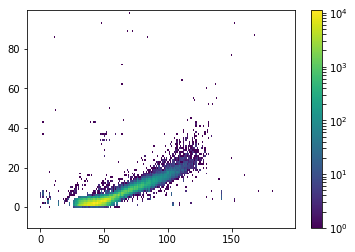

.


In [52]:
rhts = pd.np.arange(-10.5, 200.5)
rwts = pd.np.arange(-10.5, 100.5)
plt.hist2d(X, Y, bins=(rhts, rwts), norm=LogNorm())
plt.colorbar()
plt.show()
print('.')

.


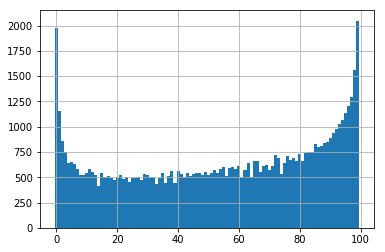

In [41]:
df_bmi.BMI_VAL.hist(bins=pd.np.arange(-0.5, 100.5))
print('.')

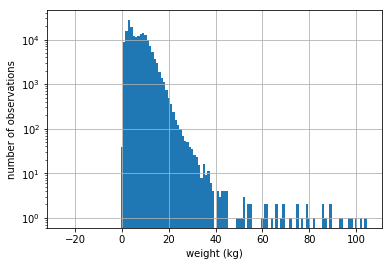

In [79]:
df_weights.VITAL_VALUE_NUM.hist(bins=rwts)
plt.yscale('log')
plt.xlabel('weight (kg)')
plt.ylabel('number of observations')
plt.savefig('wts_log.png', bbox_inches='tight')

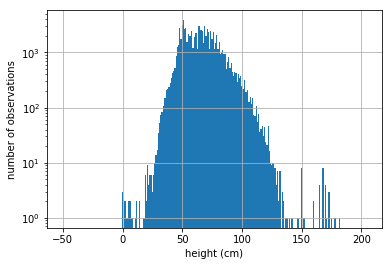

In [80]:
df_heights.VITAL_VALUE_NUM.hist(bins=rhts)
plt.yscale('log')
plt.xlabel('height (cm)')
plt.ylabel('number of observations')
plt.savefig('hts_log.png', bbox_inches='tight')
plt.show()

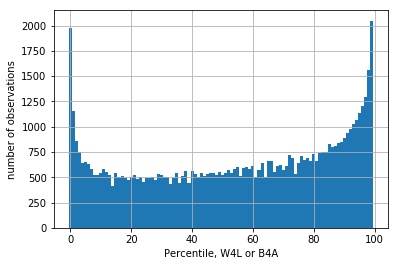

In [82]:
df_bmi.BMI_VAL.hist(bins=pd.np.arange(-0.5, 100.5))
plt.xlabel('Percentile, W4L or B4A')
plt.ylabel('number of observations')
plt.savefig('bmi_log.png', bbox_inches='tight')
plt.show()

In [55]:
df_heights[df_heights.VITAL_VALUE_NUM<=5]

STUDY_ID  VISIT_ID  VITAL_VALUE_NUM VITAL_VALUE_UNIT  \
5911      600.0  172138.0              3.0               cm   
52010    5377.0   19909.0              0.0               cm   
62978    6465.0  162646.0              4.3               cm   
66289    6834.0   15732.0              0.0               cm   
79095    8148.0   53069.0              2.3               cm   
83388    8547.0   55403.0              2.0               cm   
89729    9183.0     171.0              0.0               cm   

          COLLECTION_DATE OBSERVATION_TYPE  
5911  2018-01-17 05:00:00           HEIGHT  
52010 2014-06-06 11:38:00           HEIGHT  
62978 2017-12-10 00:00:00           HEIGHT  
66289 2013-09-05 10:55:00           HEIGHT  
79095 2014-03-19 22:55:00           HEIGHT  
83388 2012-05-19 22:00:00           HEIGHT  
89729 2014-01-20 16:15:00           HEIGHT

In [63]:
df_heights_f = df_heights[df_heights.VITAL_VALUE_NUM>0]
df_weights_f = df_weights[df_weights.VITAL_VALUE_NUM>0]

In [58]:
from matplotlib.colors import LogNorm

In [75]:
X, Y = zip(
    *(df_heights.merge(
        df_weights,
        how='inner',
        on='VISIT_ID',
        suffixes=('_h', '_w')
    )[['VITAL_VALUE_NUM_h', 'VITAL_VALUE_NUM_w']].values)
)

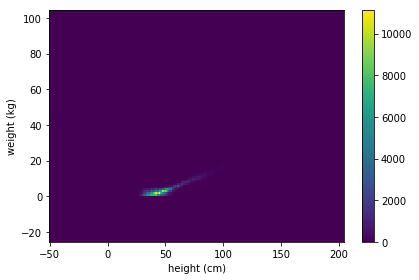

.


In [77]:
rhts = pd.np.arange(-50.5, 205.5)
rwts = pd.np.arange(-25.5, 105.5)
plt.hist2d(X, Y, bins=(rhts, rwts), norm=LogNorm())
plt.colorbar()
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.tight_layout()
plt.savefig('wVh.png', bbox_inches='tight')
plt.show()
print('.')

In [66]:
len(df_heights), len(df_heights_f)

(93464, 93461)

In [85]:
df_patient.head().T

0                   1                        2  \
STUDY_ID                      1                   2                        3   
AGE                           1                   1                        1   
SEX                           M                   F                        F   
LANGUAGE                    ENG                 POR                      ENG   
ETHNICITY    Hispanic or Latino  Hispanic or Latino   Not Hispanic or Latino   
RACE                      White          Other Race                    White   
RELIGION                    NaN                 NaN  No Religious Preference   
COUNTY                   45-083              45-015                   45-087   
URBAN_RURAL                   3                   3                        3   
AGE_DAYS                    597                 591                      594   
AGE_MONTHS                 19.6                19.4                     19.5   

                                  3                       4  
STUDY_ID                          4                       5  
AGE                               1                       1  
SEX                               F                       M  
LANGUAGE                        ENG                     ENG  
ETHNICITY    Not Hispanic or Latino  Not Hispanic or Latino  
RACE               African American        African American  
RELIGION                        NaN                     NaN  
COUNTY                       45-071                  45-083  
URBAN_RURAL                       3                       3  
AGE_DAYS                        558                     562  
AGE_MONTHS                     18.3                    18.5

In [88]:
len(df_patient)

9513

In [89]:
len(df_visit)

186849

In [94]:
for k, v in dfs.items():
    print(k, len(v))

weights 182731
procedure 253693
vital 276195
visit 186849
vis_cipher 186849
pat_cipher 9513
heights 93464
patient 9513
bmi 69379
diagnosis 290923
